# <p style="background-image: url(https://i.postimg.cc/7hr3Jxfz/cancer-HSIL-image.jpg);font-family:camtasia;font-size:95%;color:red;text-align:center;border-radius:15px 50px; padding:7px"> Introduction </p>

Real-world clinical data extracted from hospital environments constitutes a pivotal resource in medical research. This dataset is specifically curated to bolster advancements in cervical cancer screening and diagnosis. To propel the development of automated diagnostic systems, a substantial volume of diverse input data is imperative. The establishment of this Cervical Cancer images dataset endeavors to provide a significant stride forward by offering a comprehensive dataset for the refinement and implementation of algorithms for automated cervical cancer diagnostics.

# <p style="background-image: url(https://i.postimg.cc/7hr3Jxfz/cancer-HSIL-image.jpg);font-family:camtasia;font-size:95%;color:red;text-align:center;border-radius:15px 50px; padding:7px"> Import Libraries </p>

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Conv2DTranspose, Reshape, BatchNormalization, Dropout, Input, ReLU, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

# <p style="background-image: url(https://i.postimg.cc/7hr3Jxfz/cancer-HSIL-image.jpg);font-family:camtasia;font-size:95%;color:red;text-align:center;border-radius:15px 50px; padding:7px"> Import Datasets</p>

In [2]:
# Loading and Preparing Cervical Cancer Images Dataset using Keras Image Data Generator
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 256, 256
batchsize = 32

# Define the directories
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='/kaggle/input/malhari-dataset/Malhari Dataset/Malhari_Dataset_V1',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
    subset='training'  # Only for training data
)

colposcopic_generator = train_datagen.flow_from_directory(
    directory='/kaggle/input/malhari-dataset/Malhari Dataset/Malhari_Dataset_V1/colposcopic',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
)

pap_generator = train_datagen.flow_from_directory(
    directory='/kaggle/input/malhari-dataset/Malhari Dataset/Malhari_Dataset_V1/pap',
    target_size=(img_width, img_height),
    batch_size=batchsize,
    class_mode='categorical',  # or 'binary' if it's a binary classification
)


Found 452 images belonging to 2 classes.
Found 134 images belonging to 3 classes.
Found 318 images belonging to 4 classes.


# <p style="background-image: url(https://i.postimg.cc/7hr3Jxfz/cancer-HSIL-image.jpg);font-family:camtasia;font-size:95%;color:red;text-align:center;border-radius:15px 50px; padding:7px"> Colposcope </p>


<p style="color: darkblue; font-size: 17px;">A colposcope is a medical instrument used by healthcare providers, typically gynecologists, to closely examine a woman's cervix, vagina, and vulva for signs of abnormality or disease. It resembles a pair of binoculars mounted on a stand with a light source.</p>


<div style="background-color: #E6F7FF; padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0,0,0,0.1);">
    
<h2 style="color: #009688;">A colposcope is a medical instrument...</h2>
    
<p>Purpose: Colposcopy is performed when there are abnormal results from a Pap smear or other screening tests for cervical cancer. It provides a more detailed view of the cervix, allowing the healthcare provider to identify any areas of concern.</p>

<p>Procedure: During a colposcopy, the woman lies on an examination table with her feet in stirrups, similar to a pelvic exam. The colposcope is positioned a few inches from the vulva. The provider uses a speculum to hold the vaginal walls apart and then applies a mild vinegar-like solution to the cervix. This solution helps highlight any abnormal areas.</p>

<p>Magnification and Lighting: The colposcope provides a magnified view of the cervix, allowing the healthcare provider to see even tiny abnormalities. It also has a bright light source to illuminate the area.</p>

<p>Biopsy: If the provider sees any suspicious areas, they may take a small tissue sample (biopsy) for further examination in a laboratory. This helps in determining the nature and severity of any abnormalities.</p>

<p>Pain and Discomfort: The colposcopy itself is not typically painful, but some women may experience mild discomfort or pressure. If a biopsy is performed, there may be a brief pinch or stinging sensation.</p>

<p>Duration: A colposcopy usually takes around 10 to 20 minutes.</p>

<p>Follow-Up: Depending on the results, further treatment or monitoring may be recommended.</p>

<p>Colposcopy is an important tool in gynecology for detecting and evaluating cervical abnormalities. It allows for early intervention and treatment, which can greatly reduce the risk of cervical cancer. It's worth noting that having a colposcopy doesn't necessarily mean there is a serious problem; it's a precautionary measure to ensure optimal health.</p>
</div>


<p style="color: darkblue; font-size: 17px;">CIN stands for "Cervical Intraepithelial Neoplasia." It refers to abnormal changes in the cells on the surface of the cervix. These changes are not cancer, but they can lead to cancer if not treated.</p>

<h4>There are three main grades of CIN:<h4>

<h3 style="color: #4CAF50;">CIN1 (Mild Dysplasia):</h3><p> This is the mildest form of abnormal cell changes. It means that the cells on the surface of the cervix are mildly abnormal. In many cases, CIN1 will go away on its own without treatment. It's monitored closely through Pap smears and may not require immediate intervention.</p>

<h3 style="color: #4CAF50;">CIN2 (Moderate Dysplasia):</h3><p>CIN2 indicates a moderate degree of abnormal cell changes. It's a more advanced stage than CIN1. While some cases of CIN2 might regress on their own, treatment is often recommended to prevent progression to a more severe stage.</p>

<h3 style="color: #4CAF50;">CIN3 (Severe Dysplasia or Carcinoma In Situ):</h3><p>CIN3 is the most advanced form of abnormal cell changes before they become cancerous. The cells in CIN3 are highly abnormal and may be close to becoming invasive cancer. Treatment is typically recommended to remove or destroy these abnormal cells.</p>

It's important to note that early detection and treatment of CIN can prevent the development of cervical cancer. Regular Pap smears and HPV testing are crucial in identifying and managing these changes. If detected early, CIN can be effectively treated, reducing the risk of cervical cancer.

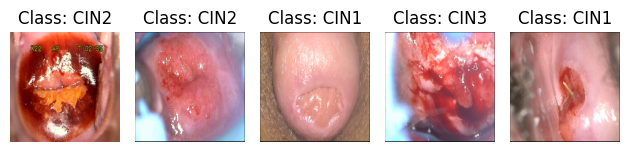

In [3]:
# Define class labels
class_labels = ['CIN1', 'CIN2', 'CIN3']

# Get a batch of data from the generator
x_batch, y_batch = colposcopic_generator.next()

# Define the number of images to display
num_images_to_display = 5

# Display the images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(x_batch[i])
    
    # Find the index of the class with the highest probability
    class_index = np.argmax(y_batch[i])
    
    plt.title(f'Class: {class_labels[class_index]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('class_labels_colposcope.png')
plt.show()


Here are some reputable sources where you can find more information about Cervical Intraepithelial Neoplasia (CIN):

American Cancer Society:

* [Cervical Intraepithelial Neoplasia (CIN)](https://www.cancer.org/cancer/cervical-cancer/detection-diagnosis-staging/about-cervical-intraepithelial-neoplasia.html)

Mayo Clinic:

* [Cervical dysplasia](https://www.mayoclinic.org/diseases-conditions/cervical-dysplasia/symptoms-causes/syc-20352552)

Centers for Disease Control and Prevention (CDC):

* [Cervical Dysplasia and Cancer](https://www.cdc.gov/cancer/cervical/basic_info/dysplasia.htm)

National Cervical Cancer Coalition:

* [Cervical Intraepithelial Neoplasia (CIN)](https://www.nccc-online.org/hpvcervical-cancer/cervical-dysplasia/cin/)

WebMD:

* [Cervical Dysplasia and Cervical Cancer](https://www.webmd.com/women/cervical-dysplasia-cervical-cancer)

These sources provide detailed information about Cervical Intraepithelial Neoplasia, including its causes, risk factors, diagnosis, and treatment options. Always consult with a healthcare professional for personalized advice and information specific to your situation.

# <p style="background-image: url(https://i.postimg.cc/7hr3Jxfz/cancer-HSIL-image.jpg);font-family:camtasia;font-size:90%;color:red;text-align:center;border-radius:15px 50px; padding:7px"> Pap smear </p>


<p style="color:#9C27B0; font-size: 17px;"> A Pap smear, also known as Pap test, is a screening procedure used to detect abnormal cells in the cervix, which is the lower part of the uterus that opens into the vagina. It is an essential tool in the early detection and prevention of cervical cancer.<p> 

<p style="color:#9C27B0; font-size: 17px;">During a Pap smear, a healthcare provider uses a speculum to gently open the vaginal canal and collects a sample of cells from the cervix. These cells are then sent to a laboratory for examination. Abnormalities in the cells can indicate changes that may lead to cervical cancer if left untreated.<p>

<h3 style="color:#009688;">HSIL (High-Grade Squamous Intraepithelial Lesion):</h3>

<p>HSIL indicates a more severe abnormality in the cells of the cervix. These cells are highly abnormal and have a greater potential to progress to cancer if not treated.<p>
    
Resource: [HSIL - American Cancer Society](https://www.cancer.org/cancer/cervical-cancer/detection-diagnosis-staging/abnormal-pap-test-results/high-grade-squamous-intraepithelial-lesion-hsil.html)

<h3 style="color:#009688;">LSIL (Low-Grade Squamous Intraepithelial Lesion):</h3>

<p>LSIL indicates mild to moderate abnormalities in the cells of the cervix. These changes are less severe than HSIL and may often regress without treatment.<p>
    
Resource: [LSIL - American Cancer Society](https://www.cancer.org/cancer/cervical-cancer/detection-diagnosis-staging/abnormal-pap-test-results/low-grade-squamous-intraepithelial-lesion-lsil.html)

<h3 style="color:#009688;">NILM (Negative for Intraepithelial Lesion or Malignancy):</h3>

<p>NILM means that the cervical cells appear normal and do not show any signs of precancerous or cancerous changes.<p>
    
Resource: [NILM - American Society for Colposcopy and Cervical Pathology](https://www.asccp.org/getattachment/Educational-Resources/Publications/NILM-Brochure-for-Patients.pdf.aspx)


<h3 style="color:#009688;">SSC (Squamous Cell Carcinoma):</h3>

<p>SSC is a type of cancer that can develop in various parts of the body, including the cervix. It arises from squamous cells, which are thin, flat cells that form the outer layer of many organs.<p>
    
Resource: [Squamous Cell Carcinoma - Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/squamous-cell-carcinoma/symptoms-causes/syc-20352480)

These terms are often used in the context of cervical cytology (Pap smears) and colposcopy, which are methods of screening for cervical abnormalities. It's important to note that any abnormal results, such as HSIL or LSIL, should be discussed with a healthcare provider for further evaluation and appropriate follow-up.


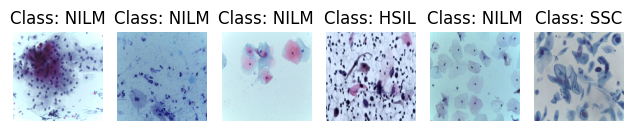

In [4]:
# Define class labels
class_labels = ['HSIL','LSIL','NILM','SSC']

# Get a batch of data from the generator
x_batch, y_batch = pap_generator.next()

# Define the number of images to display
num_images_to_display = 6

# Display the images
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(x_batch[i])
    
    # Find the index of the class with the highest probability
    class_index = np.argmax(y_batch[i])
    
    plt.title(f'Class: {class_labels[class_index]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('Class_label_pap.png')
plt.show()


In [5]:
img_width, img_height = 256, 256
batchsize = 32

train = keras. utils.image_dataset_from_directory(
    directory='/kaggle/input/malhari-dataset/Malhari Dataset/Malhari_Dataset_V1',
    batch_size = batchsize,
    image_size = (img_width, img_height))

Found 452 files belonging to 2 classes.


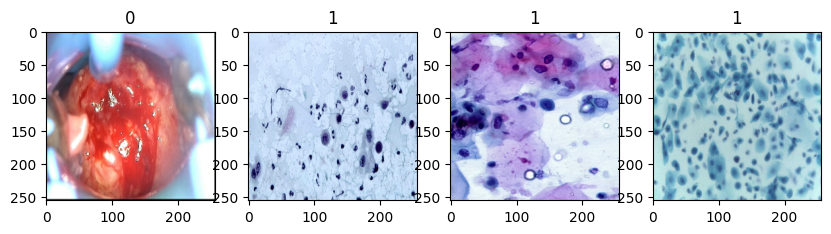

In [6]:
# Visualizing a Batch of Cervical Cancer Images

data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
# generating augmented batches of cervical cancer images using ImageDataGenerator
DIR = '/kaggle/input/malhari-dataset/Malhari Dataset/Malhari_Dataset_V1' #path

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
        DIR,
        target_size = (64, 64),
        batch_size = batchsize,
        class_mode = None)

Found 452 images belonging to 2 classes.


# <p style="background-image: url(https://i.postimg.cc/7hr3Jxfz/cancer-HSIL-image.jpg);font-family:camtasia;font-size:85%;color:red;text-align:center;border-radius:15px 50px; padding:7px">Deep Convolutional Generative Adversarial Network</p>


<p style="color:#9C27B0; font-size: 17px;">DCGAN (Deep Convolutional Generative Adversarial Network)
A DCGAN is a type of Generative Adversarial Network (GAN) that uses convolutional layers in both the generator and discriminator networks. It's designed for generating images.<p>




<html>
<head>
</head>
<body>
  <h2 style="color: #3F51B5;">The Generator</h2>
    
  <p style="color:#009688; font-size: 17px;">Purpose: The generator takes random noise as input and transforms it into an image.<p>
      
<p style="color:#009688; font-size: 17px;">Architecture: It typically consists of deconvolutional layers (also known as transposed convolutional layers) to upsample the input.<p>
    
<p style="color:#009688; font-size: 17px;">Activation Function: The final layer often uses a tanh activation function to ensure the generated image pixels are in the range [-1, 1].<p>

</body>
</html> 
    


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32768)             9863168   
                                                                 
 re_lu (ReLU)                (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 256)      2097408   
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 128)      524416    
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 64, 64, 64)       1

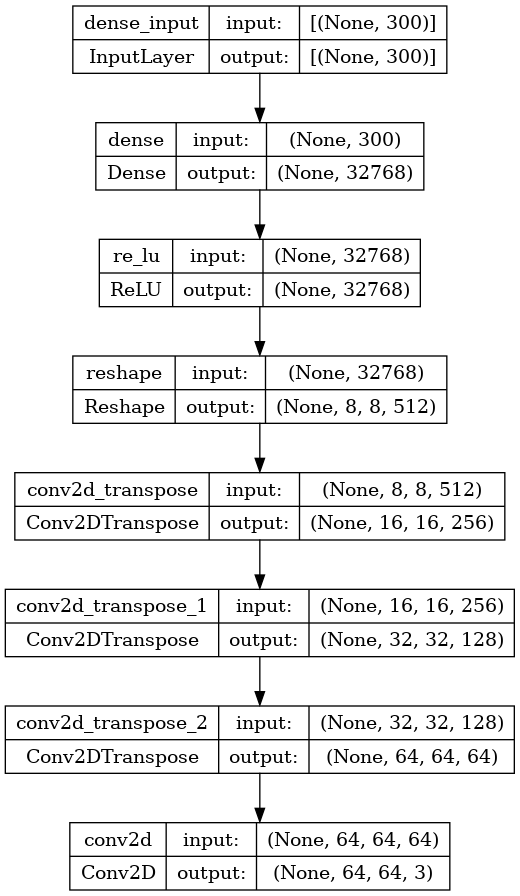

In [8]:
# generator model 

KI = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
input_dim = 300

def Generator_Model():

    Generator = Sequential()

    # random noise
    Generator.add(Dense(8 * 8 * 512, input_dim = input_dim))
    Generator.add(ReLU())
    # convert 1d to 3d
    Generator.add(Reshape((8, 8, 512)))
    # Unsample
    Generator.add(Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', kernel_initializer=KI, activation='ReLU'))
    Generator.add(Conv2D(3, (4, 4), padding='same', activation='sigmoid'))

    
    return Generator
    
generator = Generator_Model()
generator.summary()
# visualized layers of generator
keras.utils.plot_model(generator, show_shapes=True)

<html>
<head>
</head>
<body>
  <h2 style="color: #3F51B5;"> The Discriminator</h2>
    
  <p style="color:#009688; font-size: 17px;">Purpose: The discriminator distinguishes between real and fake images.<p>
      
<p style="color:#009688; font-size: 17px;">Architecture: It's a convolutional neural network (CNN) that processes images and outputs a probability indicating the likelihood of the input image being real.<p>
    
  <p style="color:#009688; font-size: 17px;">Activation Function: The final layer uses a sigmoid activation function to produce a probability score.<p>

</body>
</html>    


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)       

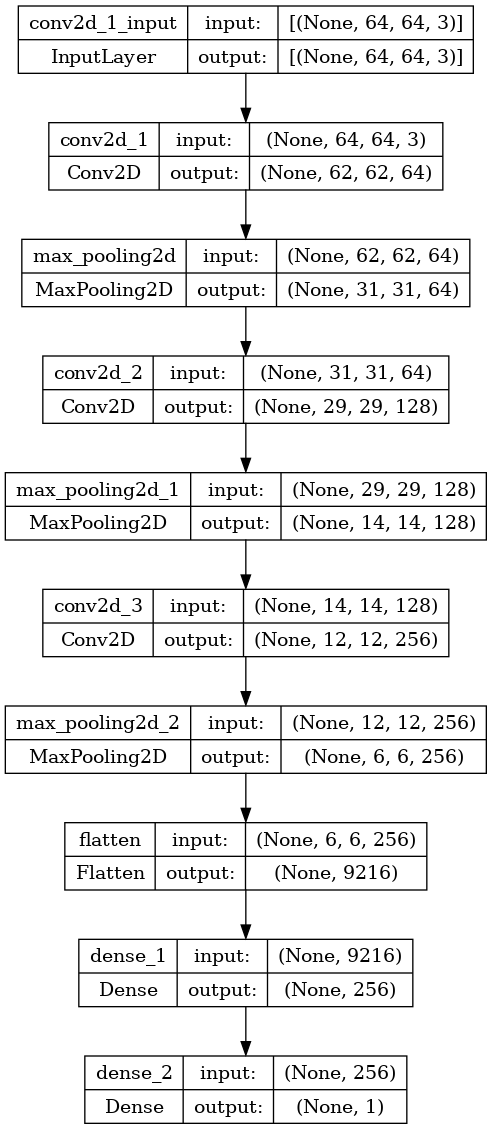

In [9]:
# creating the discriminator Model 

def Discriminator_Model():
    input_shape = (64, 64, 3)

    # Create a Sequential model
    discriminator = Sequential()
    discriminator.add(Conv2D(64,kernel_size=(3, 3), activation='LeakyReLU', input_shape = input_shape))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(128, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Conv2D(256, kernel_size=(3, 3), activation='LeakyReLU'))
    discriminator.add(MaxPooling2D(pool_size=(2, 2)))
    discriminator.add(Flatten())
    discriminator.add(Dense(256, activation='LeakyReLU'))
    discriminator.add(Dense(1, activation='sigmoid'))

    return discriminator

# training The CNN
discriminator = Discriminator_Model()
discriminator.summary()  

# visualized Layers of discriminator
keras.utils.plot_model(discriminator, show_shapes=True)

<html>
<head>
</head>
<body>
  <h2 style="color: #3F51B5;">The Training Process of DCGAN</h2>
    
<p style="color:#009688; font-size: 17px;">Generator Training: The generator initially produces random images. These are fed to the discriminator along with real images. The discriminator provides feedback to the generator.<p>

<p style="color:#009688; font-size: 17px;">Discriminator Training: The discriminator learns to distinguish real from fake images. It's trained with both real and fake images.<p>
    
<p style="color:#009688; font-size: 17px;">Adversarial Training: The generator aims to produce images that can fool the discriminator. It's trained in tandem with the discriminator.<p>
    
</body>
</html>
    

In [10]:
# DCGAN model training of Discriminator and Generator

class DCGAN(keras.Model):
    def __init__(self, generator, discriminator, latent_dim = input_dim):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.latent_dim = latent_dim
        self.g_loss_metric = keras.metrics.Mean(name='g_loss')
        self.d_loss_metric = keras.metrics.Mean(name='d_loss')
        
    @property
    def metrics(self):
        return [self.g_loss_metric, self.d_loss_metric]
    
    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(DCGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn
        
    def train_step(self, real_images):
        # get batch size from the data
        batch_size = tf.shape(real_images)[0]
        # generate random noise
        random_noise = tf.random.normal(shape=(batch_size, self.latent_dim))
        
        # train the discriminator 
        with tf.GradientTape() as tape:
            # compute loss on real images
            pred_real = self.discriminator(real_images, training=True)
            # generate real image labels
            real_labels = tf.ones((batch_size, 1))
            # label smoothing
            real_labels += 0.05 * tf.random.uniform(tf.shape(real_labels))
            d_loss_real = self.loss_fn(real_labels, pred_real)
            
            # compute loss on fake images
            fake_images = self.generator(random_noise)
            pred_fake = self.discriminator(fake_images, training=True)
            # generate fake labels
            fake_labels = tf.zeros((batch_size, 1))
            d_loss_fake = self.loss_fn(fake_labels, pred_fake)
            
            # total discriminator loss
            d_loss = (d_loss_real + d_loss_fake) / 2
            
        # compute discriminator gradients
        gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        # update the gradients
        self.d_optimizer.apply_gradients(zip(gradients, self.discriminator.trainable_variables))
        
        
        # train the generator model
        labels = tf.ones((batch_size, 1))
        # generator want discriminator to think that fake images are real
        with tf.GradientTape() as tape:
            # generate fake images from generator
            fake_images = self.generator(random_noise, training=True)
            # classify images as real or fake
            pred_fake = self.discriminator(fake_images, training=True)
            # compute loss
            g_loss = self.loss_fn(labels, pred_fake)
            
        # compute gradients
        gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        # update the gradients
        self.g_optimizer.apply_gradients(zip(gradients, self.generator.trainable_variables))
        
        # update states for both models
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        
        return {'d_loss': self.d_loss_metric.result(), 'g_loss': self.g_loss_metric.result()}

<html>
<head>
</head>
<body>
  <h2 style="color: #3F51B5;">The Monitoring process</h2>
    
<p style="color:#009688; font-size: 17px;">Losses: During training, you monitor the generator and discriminator losses. The generator loss indicates how well it's fooling the discriminator, while the discriminator loss shows how well it's distinguishing real from fake images.<p>
    
</body>
</html>


In [11]:
# DCGAN Monitor for Image Generation and Model Saving

class DCGANMonitor(keras.callbacks.Callback):
    def __init__(self, num_imgs=25, latent_dim = input_dim):
        self.num_imgs = num_imgs
        self.latent_dim = latent_dim
        # create random noise for generating images
        self.noise = tf.random.normal([25, latent_dim])

    def on_epoch_end(self, epoch, logs = None):
        # generate the image from noise
        g_img = self.model.generator(self.noise)
        # denormalize the image
        g_img = (g_img * 255) + 255
        g_img.numpy()
        
    def on_train_end(self, logs = None):
        self.model.generator.save('DCGEN.h5')

<html>
<head>
</head>
<body>
  <h2 style="color: #3F51B5;">Train The Model</h2>

<p style="color:#009688; font-size: 17px;">Training Loop: Train the DCGAN by iteratively training the discriminator and generator in alternating steps.<p>
    
</body>
</html>


In [12]:
# training DCGAN on i dataset for 30 epochs

epochs = 30
lr_g =0.0003
lr_d = 0.0001
beta = 0.5
latent_dim = 300

dcgan = DCGAN(generator=generator, discriminator=discriminator, latent_dim = latent_dim )
dcgan.compile(g_optimizer = Adam (learning_rate= lr_g, beta_1= beta), d_optimizer= Adam (learning_rate = lr_g , beta_1= beta), loss_fn = BinaryCrossentropy())

# fit the model and save the history
history = dcgan.fit(train_generator, epochs=epochs, callbacks=[DCGANMonitor()])


Epoch 1/30
15/15 [==============================] - 54s 3s/step - d_loss: 0.6742 - g_loss: 0.6492
Epoch 2/30
15/15 [==============================] - 49s 3s/step - d_loss: 0.6239 - g_loss: 0.7621
Epoch 3/30
15/15 [==============================] - 50s 3s/step - d_loss: 0.5792 - g_loss: 0.9193
Epoch 4/30
15/15 [==============================] - 49s 3s/step - d_loss: 0.5382 - g_loss: 0.9093
Epoch 5/30
15/15 [==============================] - 50s 3s/step - d_loss: 0.5749 - g_loss: 1.2199
Epoch 6/30
15/15 [==============================] - 50s 3s/step - d_loss: 0.4487 - g_loss: 1.0800
Epoch 7/30
15/15 [==============================] - 50s 3s/step - d_loss: 0.4535 - g_loss: 1.3117
Epoch 8/30
15/15 [==============================] - 50s 3s/step - d_loss: 0.2731 - g_loss: 1.3163
Epoch 9/30
15/15 [==============================] - 50s 3s/step - d_loss: 1.1806 - g_loss: 1.4721
Epoch 10/30
15/15 [==============================] - 50s 3s/step - d_loss: 0.5606 - g_loss: 1.4211
Epoch 11/30
15/15 [

<html>
<head>
</head>
<body>
  <h2 style="color: #3F51B5;">Evaluation of Model Results</h2>

<p style="color:#009688; font-size: 17px;">After training, you evaluate the generated images visually and, if possible, with quantitative metrics.
Ensure the generated images are of high quality, diverse, and realistic.<p>
    
</body>
</html>




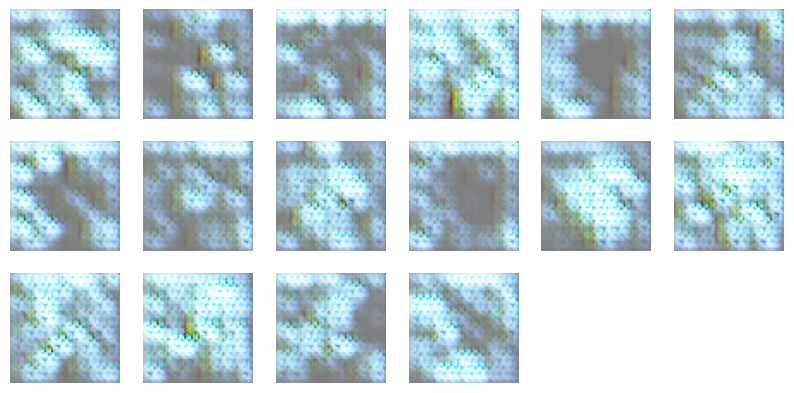

In [13]:
# generating 16 random images with DCGAN

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(6, 6, i + 1)
    # Generate random noise for each image
    noise = tf.random.normal([1, 300])
    mg = dcgan.generator(noise)
    # Denormalize
    mg = (mg * 255) + 255

    mg.numpy()
    image = Image.fromarray(np.uint8(mg[0]))

    plt.imshow(image)
    plt.axis('off')

plt.show()

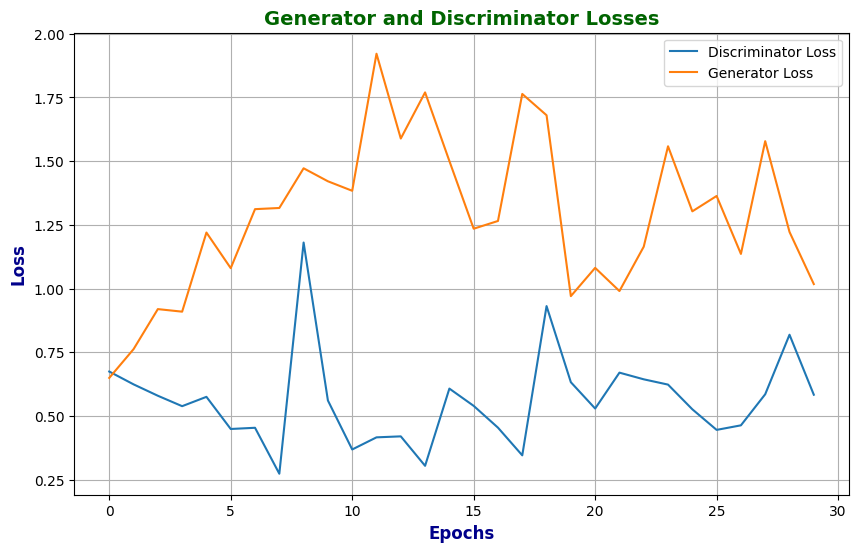

In [14]:
# function to create a figure for the losses
def create_loss_figure(d_loss_values, g_loss_values):
    plt.figure(figsize=(10, 6))
    plt.plot(d_loss_values, label='Discriminator Loss')
    plt.plot(g_loss_values, label='Generator Loss')
    plt.title('Generator and Discriminator Losses', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
    plt.xlabel('Epochs', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    plt.ylabel('Loss', fontsize = 12, fontweight = 'bold', color = 'darkblue')
    plt.legend()
    plt.grid(True)
    plt.savefig('Generator and Discriminator Losses.png')
    plt.show()

# access the loss values from the history
d_loss_values = history.history['d_loss']
g_loss_values = history.history['g_loss']

# call the create_loss_figure function with the loss values
create_loss_figure(d_loss_values, g_loss_values)

<div class="alert alert-block alert-info"> "Your positive feedback and upvotes are incredibly appreciated! They inspire me to create more valuable content and help others in their learning journey. Your support fosters a vibrant community of knowledge-sharing. Thank you for considering an upvote, and best wishes on your learning journey!" 😊📌</div>